In [13]:
import pandas as pd

data = pd.read_csv("Diwali Sales Data.csv", encoding='unicode_escape')
data.head(20)
data.isnull().sum()
data['Amount'].fillna(data['Amount'].mean(), inplace=True)
data.isnull().sum()










C:\Users\hp\AppData\Local\Temp\ipykernel_10836\1658274035.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Amount'].fillna(data['Amount'].mean(), inplace=True)


User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                  0
Status              11251
unnamed1            11251
dtype: int64

In [17]:
data.drop(['Status', 'unnamed1', 'Unnamed: 1', 'Status '], axis=1, inplace=True, errors='ignore')



In [18]:
data.columns.tolist()


['User_ID',
 'Cust_name',
 'Product_ID',
 'Gender',
 'Age Group',
 'Age',
 'Marital_Status',
 'State',
 'Zone',
 'Occupation',
 'Product_Category',
 'Orders',
 'Amount']

In [19]:
data.info()
data.describe()
print("Shape:", data.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11251 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB
Shape: (11251, 13)


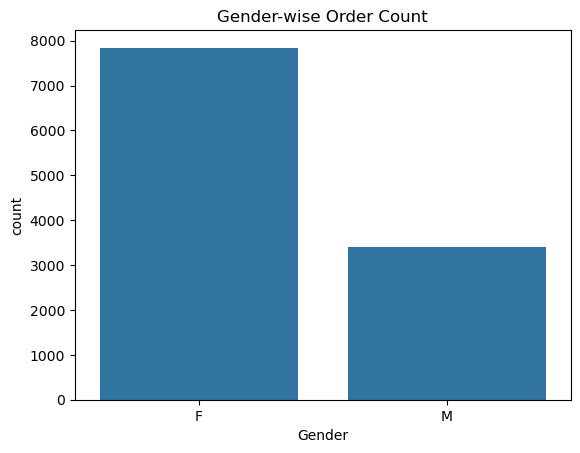

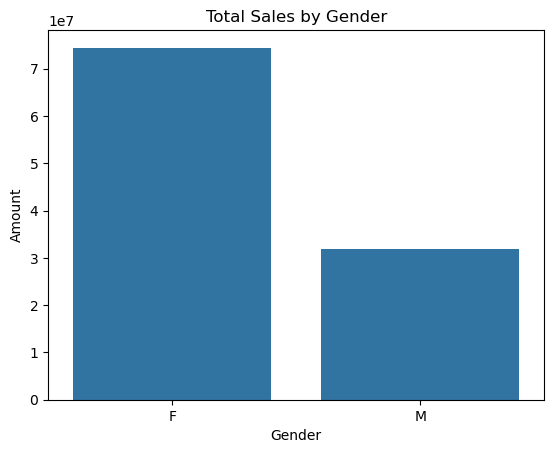

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='Gender', data=data)
plt.title("Gender-wise Order Count")
plt.show()
gender_sales = data.groupby('Gender')['Amount'].sum().reset_index()
sns.barplot(x='Gender', y='Amount', data=gender_sales)
plt.title("Total Sales by Gender")
plt.show()


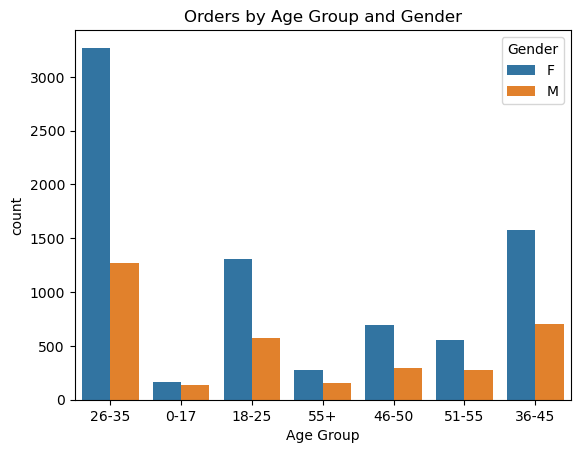

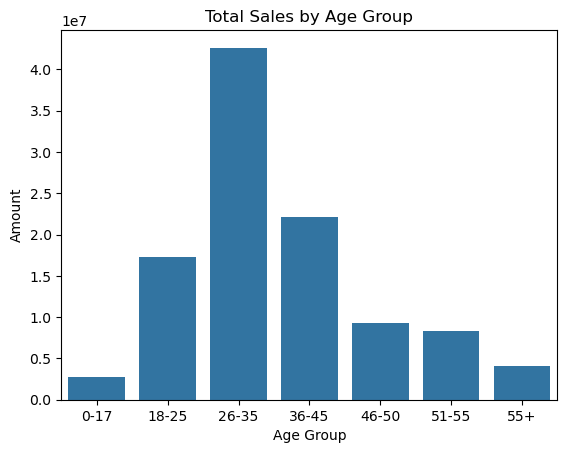

In [22]:
sns.countplot(x='Age Group', hue='Gender', data=data)
plt.title("Orders by Age Group and Gender")
plt.show()
age_sales = data.groupby('Age Group')['Amount'].sum().reset_index()
sns.barplot(x='Age Group', y='Amount', data=age_sales)
plt.title("Total Sales by Age Group")
plt.show()


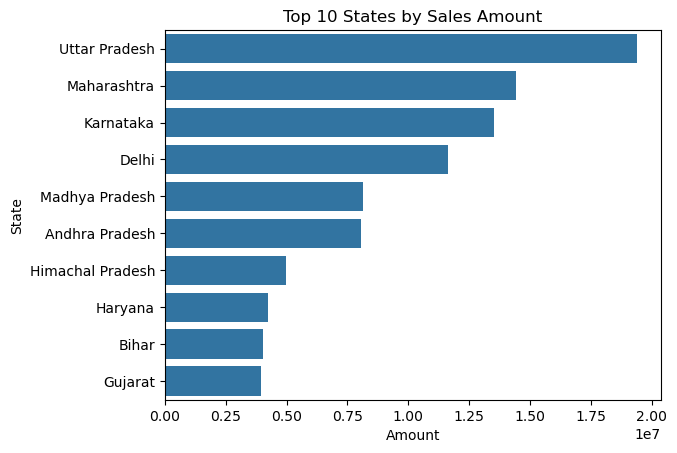

In [23]:
state_sales = data.groupby('State')['Amount'].sum().sort_values(ascending=False).head(10).reset_index()
sns.barplot(x='Amount', y='State', data=state_sales)
plt.title("Top 10 States by Sales Amount")
plt.show()


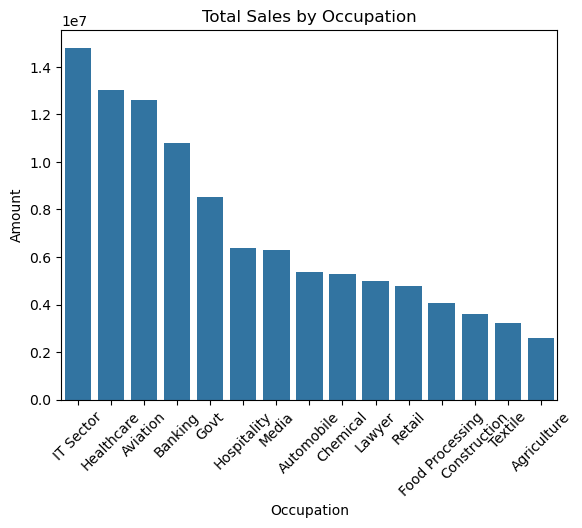

In [24]:
occ_sales = data.groupby('Occupation')['Amount'].sum().sort_values(ascending=False).reset_index()
sns.barplot(x='Occupation', y='Amount', data=occ_sales)
plt.title("Total Sales by Occupation")
plt.xticks(rotation=45)
plt.show()


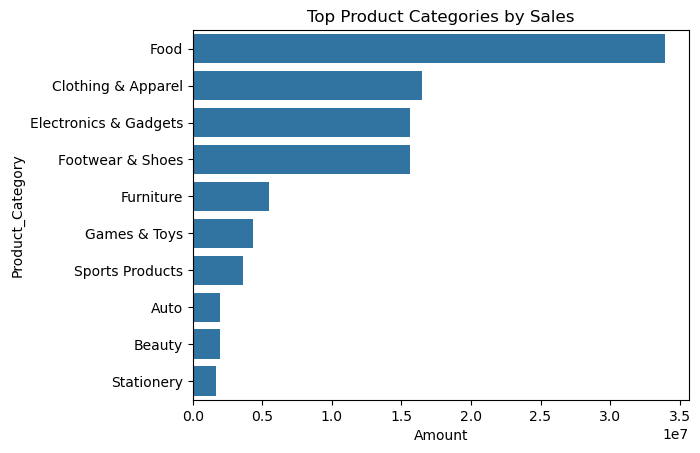

In [25]:
cat_sales = data.groupby('Product_Category')['Amount'].sum().sort_values(ascending=False).head(10).reset_index()
sns.barplot(x='Amount', y='Product_Category', data=cat_sales)
plt.title("Top Product Categories by Sales")
plt.show()


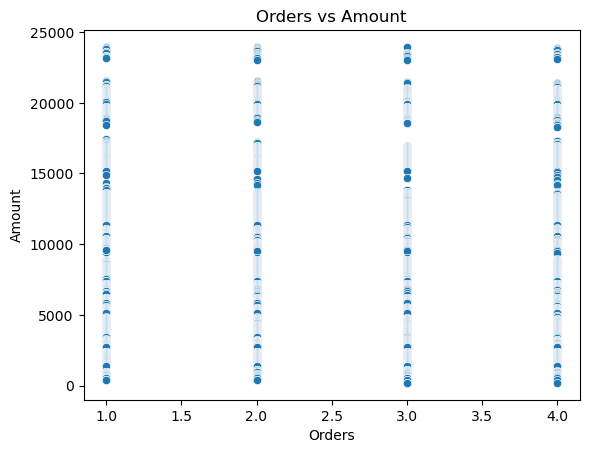

In [26]:
sns.scatterplot(x='Orders', y='Amount', data=data)
plt.title("Orders vs Amount")
plt.show()
